Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; tota

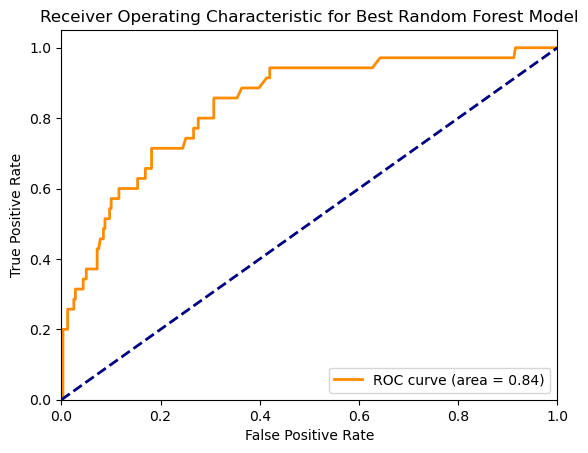

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load and preprocess data
data = pd.read_csv("RF_imputation_NEW.csv")
data.drop(columns=['deathtime', 'survival_time', 'LOS', 'Unnamed_0', 'V1', 'admittime', 'ID', 'group', 'tLOS', 'subject_id'], inplace=True)
data['outcome'] = data['outcome'].astype(int)
predictor_names = data.columns.difference(['outcome'])

# Function to preprocess data
def preprocess_data(data, predictor_names, random_seed):
    scaler = StandardScaler()
    data[predictor_names] = scaler.fit_transform(data[predictor_names])
    train_data, valid_data = train_test_split(data, test_size=0.3, random_state=random_seed)
    return train_data, valid_data

# Preprocess the data
train_data, valid_data = preprocess_data(data, predictor_names, random_seed=42)

X_train = train_data[predictor_names]
y_train = train_data['outcome']
X_valid = valid_data[predictor_names]
y_valid = valid_data['outcome']

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search_rf.best_params_)
print("Best cross-validation score: ", grid_search_rf.best_score_)

# Evaluate the best model
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_valid)
y_pred_proba_best_rf = best_rf.predict_proba(X_valid)[:, 1]

print(classification_report(y_valid, y_pred_best_rf, zero_division=0))

# Calculate AUC for the best model
auc_best_rf = roc_auc_score(y_valid, y_pred_proba_best_rf)
print(f"AUC for the best model: {auc_best_rf}")

# Plot ROC curve for the best model
fpr_best_rf, tpr_best_rf, thresholds_best_rf = roc_curve(y_valid, y_pred_proba_best_rf)
plt.figure()
plt.plot(fpr_best_rf, tpr_best_rf, color='darkorange', lw=2, label=f'ROC curve (area = {auc_best_rf:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Best Random Forest Model')
plt.legend(loc="lower right")
plt.show()


              precision    recall  f1-score   support

           0       0.93      0.92      0.93       319
           1       0.35      0.40      0.37        35

    accuracy                           0.87       354
   macro avg       0.64      0.66      0.65       354
weighted avg       0.88      0.87      0.87       354

AUC: 0.8346618898343036


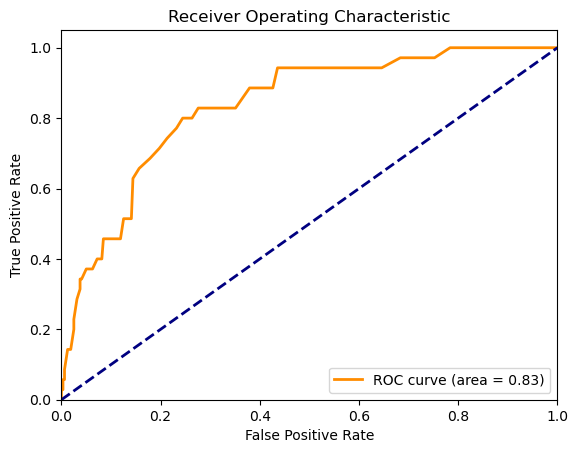

Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score:  0.9399141630901288
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       319
           1       0.38      0.40      0.39        35

    accuracy                           0.88       354
   macro avg       0.66      0.66      0.66       354
weighted avg       0.88      0.88      0.88       354

AUC for the best model: 0.8344827586206895


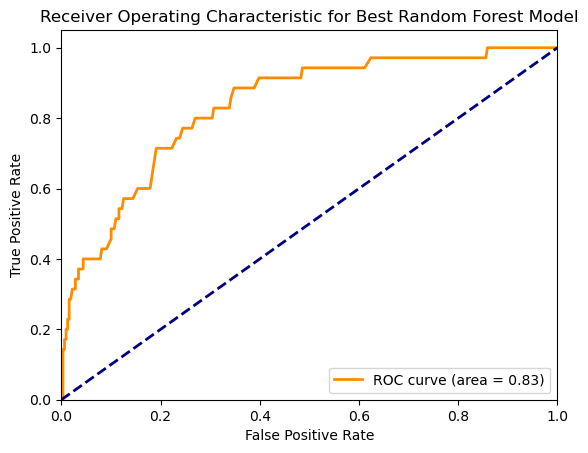

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load and preprocess data
data = pd.read_csv("RF_imputation_NEW.csv")
data.drop(columns=['deathtime', 'survival_time', 'LOS', 'Unnamed_0', 'V1', 'admittime', 'ID', 'group', 'tLOS', 'subject_id'], inplace=True)
data['outcome'] = data['outcome'].astype(int)
predictor_names = data.columns.difference(['outcome'])

# Function to preprocess data
def preprocess_data(data, predictor_names, random_seed):
    scaler = StandardScaler()
    data[predictor_names] = scaler.fit_transform(data[predictor_names])
    train_data, valid_data = train_test_split(data, test_size=0.3, random_state=random_seed)
    return train_data, valid_data

# Preprocess the data
train_data, valid_data = preprocess_data(data, predictor_names, random_seed=42)

X_train = train_data[predictor_names]
y_train = train_data['outcome']
X_valid = valid_data[predictor_names]
y_valid = valid_data['outcome']

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
y_pred = rf_model.predict(X_valid)
y_pred_proba = rf_model.predict_proba(X_valid)[:, 1]

print(classification_report(y_valid, y_pred, zero_division=0))

# Calculate AUC
auc = roc_auc_score(y_valid, y_pred_proba)
print(f"AUC: {auc}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Hyperparameter tuning using GridSearchCV for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3)
grid_search_rf.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search_rf.best_params_)
print("Best cross-validation score: ", grid_search_rf.best_score_)

# Evaluate the best model
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_valid)
y_pred_proba_best_rf = best_rf.predict_proba(X_valid)[:, 1]

print(classification_report(y_valid, y_pred_best_rf, zero_division=0))

# Calculate AUC for the best model
auc_best_rf = roc_auc_score(y_valid, y_pred_proba_best_rf)
print(f"AUC for the best model: {auc_best_rf}")

# Plot ROC curve for the best model
fpr_best_rf, tpr_best_rf, thresholds_best_rf = roc_curve(y_valid, y_pred_proba_best_rf)
plt.figure()
plt.plot(fpr_best_rf, tpr_best_rf, color='darkorange', lw=2, label=f'ROC curve (area = {auc_best_rf:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Best Random Forest Model')
plt.legend(loc="lower right")
plt.show()
